In [31]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import timedelta

In [32]:
# Загрузка данных
logs_df = pd.read_csv("../data/user_logs.csv")
logs_df['session_date'] = pd.to_datetime(logs_df['session_date'])
print(logs_df.shape)
logs_df.head(10)

(4897, 2)


,user_id,session_date
0,68b657af-9dbf-43bc-90a1-23df306054b0,2024-01-01
1,68b657af-9dbf-43bc-90a1-23df306054b0,2024-01-06
2,68b657af-9dbf-43bc-90a1-23df306054b0,2024-02-06
3,68b657af-9dbf-43bc-90a1-23df306054b0,2024-02-15
4,68b657af-9dbf-43bc-90a1-23df306054b0,2024-01-14
5,68b657af-9dbf-43bc-90a1-23df306054b0,2024-02-24
6,68b657af-9dbf-43bc-90a1-23df306054b0,2024-02-03
7,fd4e5b41-bd01-4527-9651-42afb171820d,2024-01-19
8,fd4e5b41-bd01-4527-9651-42afb171820d,2024-02-15
9,fd4e5b41-bd01-4527-9651-42afb171820d,2024-02-17


In [33]:
# Функция для расчета DAU, WAU, MAU
def calculate_metrics(df, start_date, end_date):
    metrics = []
    current_date = start_date
    while current_date <= end_date:
        dau = df[df['session_date'] == current_date]['user_id'].nunique()
        wau = df[(df['session_date'] >= current_date - timedelta(days=6)) & 
                 (df['session_date'] <= current_date)]['user_id'].nunique()
        mau = df[(df['session_date'] >= current_date - timedelta(days=29)) & 
                 (df['session_date'] <= current_date)]['user_id'].nunique()
        metrics.append({
            "date": current_date,
            "DAU": dau,
            "WAU": wau,
            "MAU": mau
        })
        current_date += timedelta(days=1)
    return pd.DataFrame(metrics)

In [34]:
# Параметры расчета
start_date = logs_df['session_date'].min()
end_date = logs_df['session_date'].max()

# Расчет метрик
metrics_df = calculate_metrics(logs_df, start_date, end_date)

# Сохранение данных в файл
# metrics_df.to_csv("metrics.csv", index=False)

In [35]:
try:
  metrics_df.index = pd.to_datetime(metrics_df['date'])
  metrics_df.drop(columns=['date'], inplace=True)
except:
  print('changes done earlier!')

metrics_df['DAU / WAU'] = metrics_df['DAU'] / metrics_df['WAU']
metrics_df['DAU / MAU'] = metrics_df['DAU'] / metrics_df['MAU']
metrics_df['WAU / MAU'] = metrics_df['WAU'] / metrics_df['MAU']

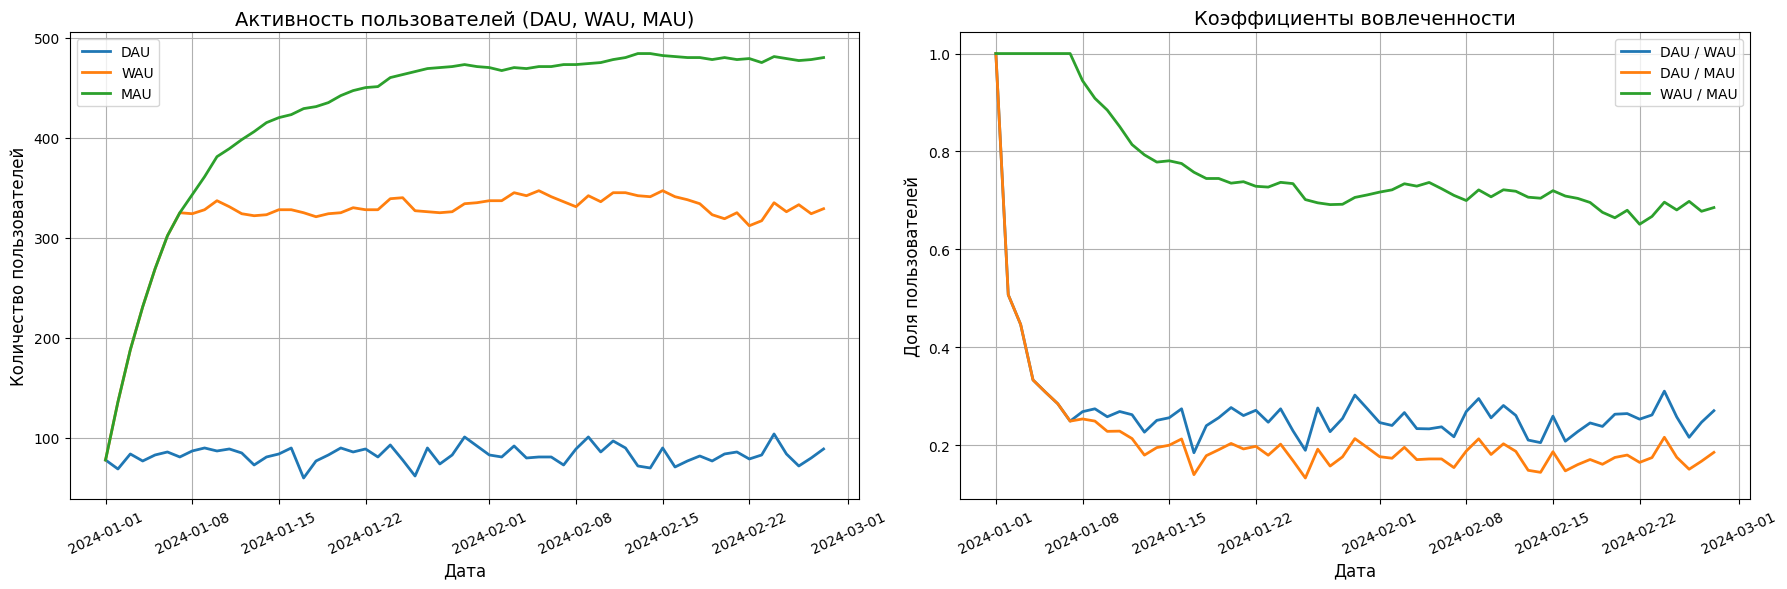

In [48]:
# Создание графиков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Линии метрик DAU, WAU, MAU
axes[0].plot(metrics_df.index, metrics_df['DAU'], label='DAU', linewidth=2)
axes[0].plot(metrics_df.index, metrics_df['WAU'], label='WAU', linewidth=2)
axes[0].plot(metrics_df.index, metrics_df['MAU'], label='MAU', linewidth=2)
axes[0].set_title('Активность пользователей (DAU, WAU, MAU)', fontsize=14)
axes[0].set_xlabel('Дата', fontsize=12)
axes[0].set_ylabel('Количество пользователей', fontsize=12)
axes[0].tick_params(axis='x', rotation=25)
axes[0].legend()
axes[0].grid(True)

# Линии коэффициентов вовлеченности
axes[1].plot(metrics_df.index, metrics_df['DAU / WAU'], label='DAU / WAU', linewidth=2)
axes[1].plot(metrics_df.index, metrics_df['DAU / MAU'], label='DAU / MAU', linewidth=2)
axes[1].plot(metrics_df.index, metrics_df['WAU / MAU'], label='WAU / MAU', linewidth=2)
axes[1].set_title('Коэффициенты вовлеченности', fontsize=14)
axes[1].set_xlabel('Дата', fontsize=12)
axes[1].set_ylabel('Доля пользователей', fontsize=12)
axes[1].tick_params(axis='x', rotation=25)
axes[1].legend()
axes[1].grid(True)

# Оформление и отображение
plt.tight_layout()
plt.show()